# Data Science - Assignment 2 | Sarah Alabdulwahab | 438204012

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
%matplotlib inline

In [2]:
# create classifiers 
lr = LinearRegression()
rfc = RandomForestClassifier(n_estimators=100)

In [3]:
# first we read the data
dataset = pd.read_csv('weather.csv')

In [4]:
# this shows us the number of the rows and columns
dataset.shape

(366, 22)

In [5]:
dataset.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [6]:
# since there are so many columns that i am not interested in, I have decided to drop them
dataset.drop(columns= 'WindDir9am', inplace = True)
dataset.drop(columns= 'WindDir3pm', inplace = True) 
dataset.drop(columns= 'WindGustSpeed', inplace = True)
dataset.drop(columns= 'WindSpeed9am', inplace = True)
dataset.drop(columns= 'WindSpeed3pm', inplace = True)
dataset.drop(columns= 'Humidity9am', inplace = True)
dataset.drop(columns= 'Humidity3pm', inplace = True)
dataset.drop(columns= 'Pressure9am', inplace = True)
dataset.drop(columns= 'Pressure3pm', inplace = True)
dataset.drop(columns= 'Cloud9am', inplace = True)
dataset.drop(columns= 'Cloud3pm', inplace = True)
dataset.drop(columns= 'Temp9am', inplace = True)
dataset.drop(columns= 'Temp3pm', inplace = True)
dataset.drop(columns= 'RISK_MM', inplace = True)

In [7]:
# this is the only data i am interested in
dataset.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,No,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,Yes,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,Yes,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,Yes,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,Yes,No


In [8]:
# view the data types for each column
dataset.dtypes

MinTemp         float64
MaxTemp         float64
Rainfall        float64
Evaporation     float64
Sunshine        float64
WindGustDir      object
RainToday        object
RainTomorrow     object
dtype: object

In [9]:
# shows the count, mean, std, min, 25%, 50%, 75%, and max of the float and int type columns
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine
count,366.000000,366.000000,366.000000,366.000000,363.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366
std,6.025800,6.690516,4.225800,2.669383,3.481517
min,-5.300000,7.600000,0.000000,0.200000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000
50%,7.450000,19.650000,0.000000,4.200000,8.600000
75%,12.500000,25.500000,0.200000,6.400000,10.500000
max,20.900000,35.800000,39.800000,13.800000,13.600000


In [10]:
# starting data cleaning
dataset.isnull().sum()

MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        3
WindGustDir     3
RainToday       0
RainTomorrow    0
dtype: int64

In [11]:
# so now there aren't many null values, i decided to use ffill instead of dropping them
dataset.fillna(method='ffill', inplace = True)
dataset.isnull().sum()

MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
WindGustDir     0
RainToday       0
RainTomorrow    0
dtype: int64

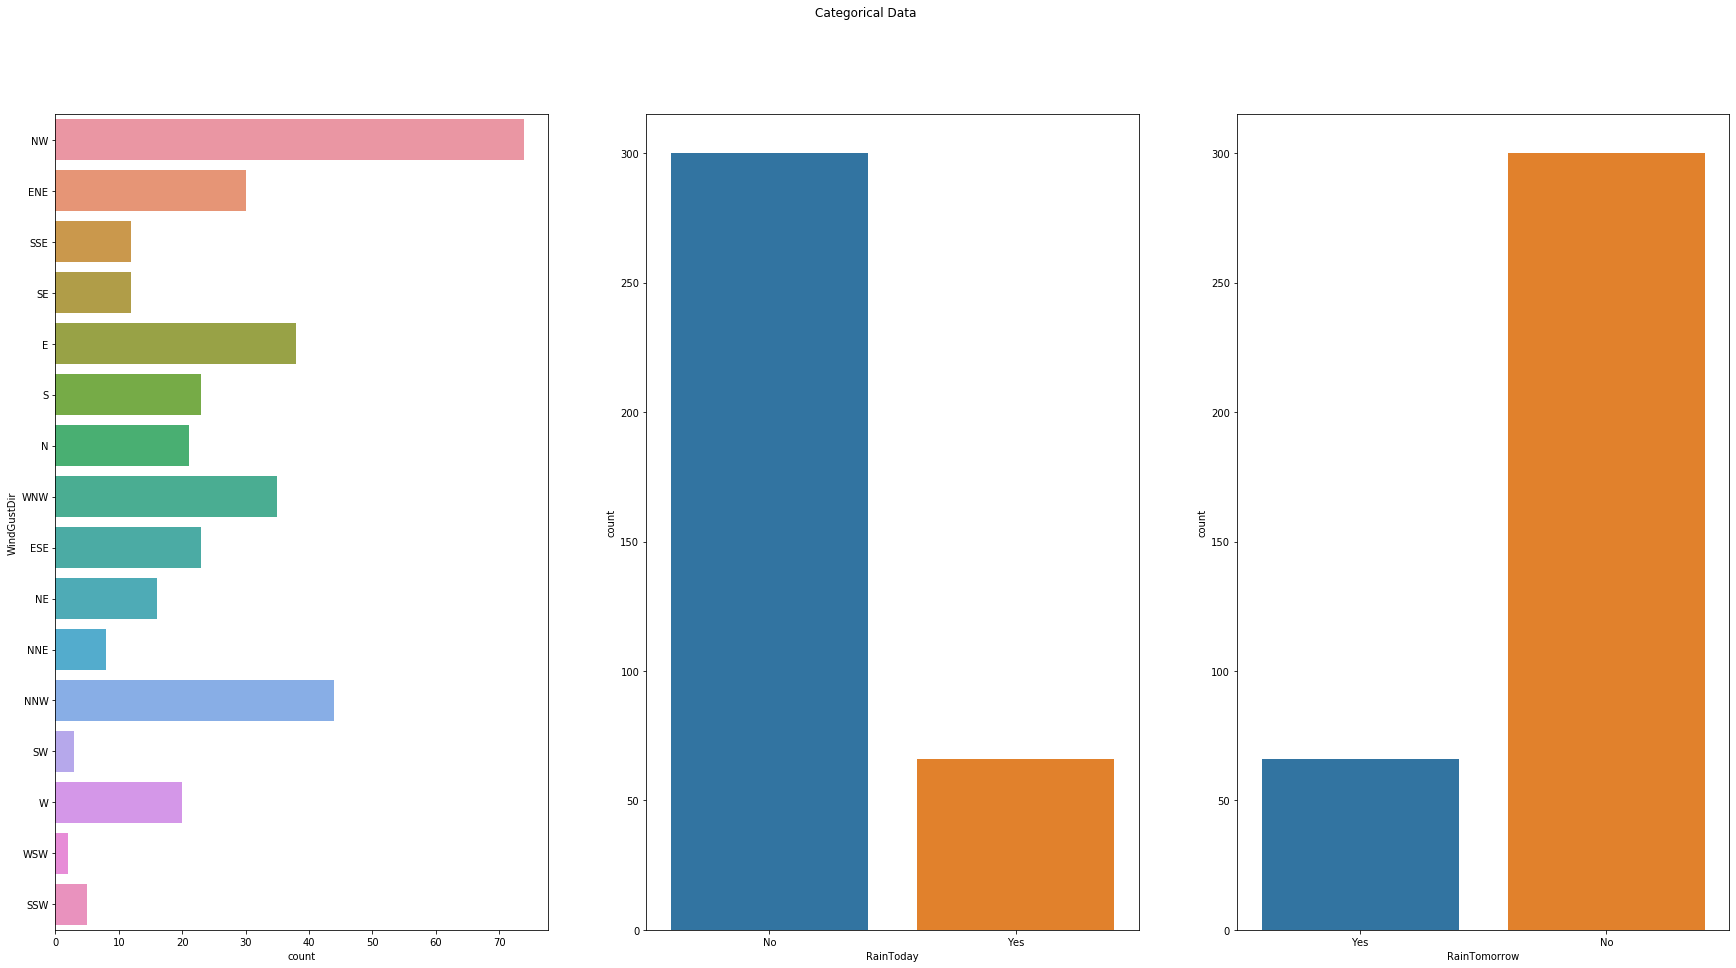

In [12]:
# visualization of the categorical data
fig,(ax1, ax2, ax3) = plt.subplots(1,3,figsize=(30,15))
plt.suptitle('Categorical Data')
sns.countplot(y = 'WindGustDir', data = dataset, ax = ax1)
sns.countplot('RainToday', data = dataset, ax = ax2)
sns.countplot('RainTomorrow', data = dataset, ax = ax3)
plt.show()

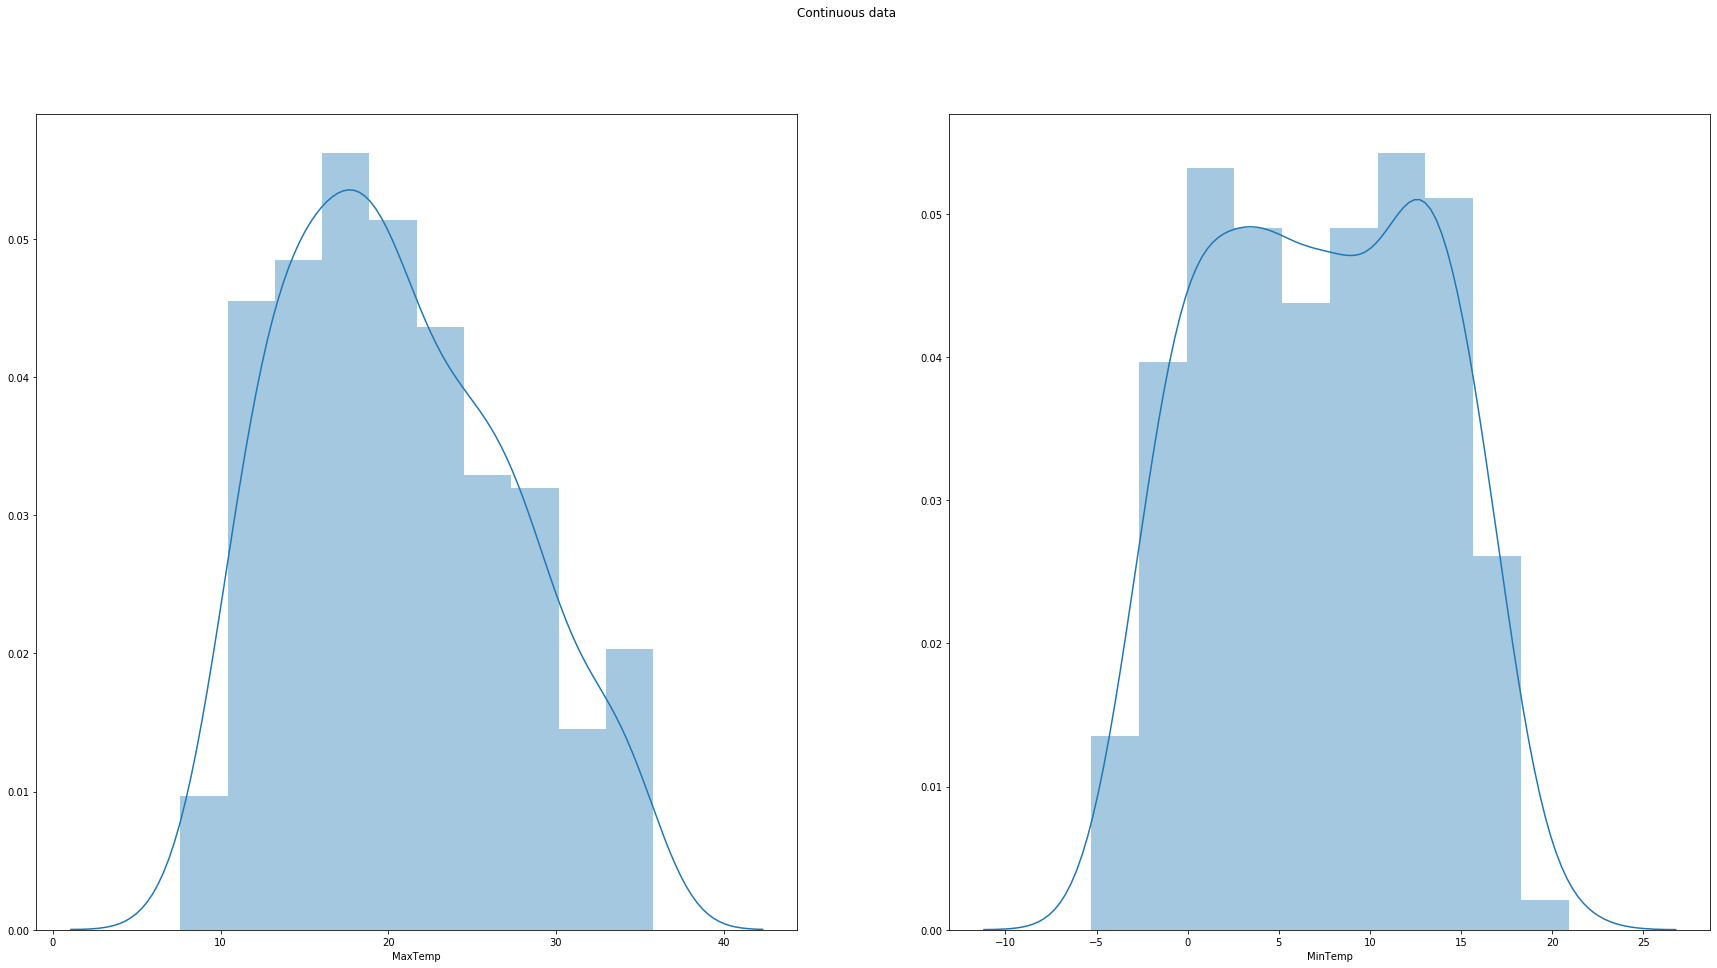

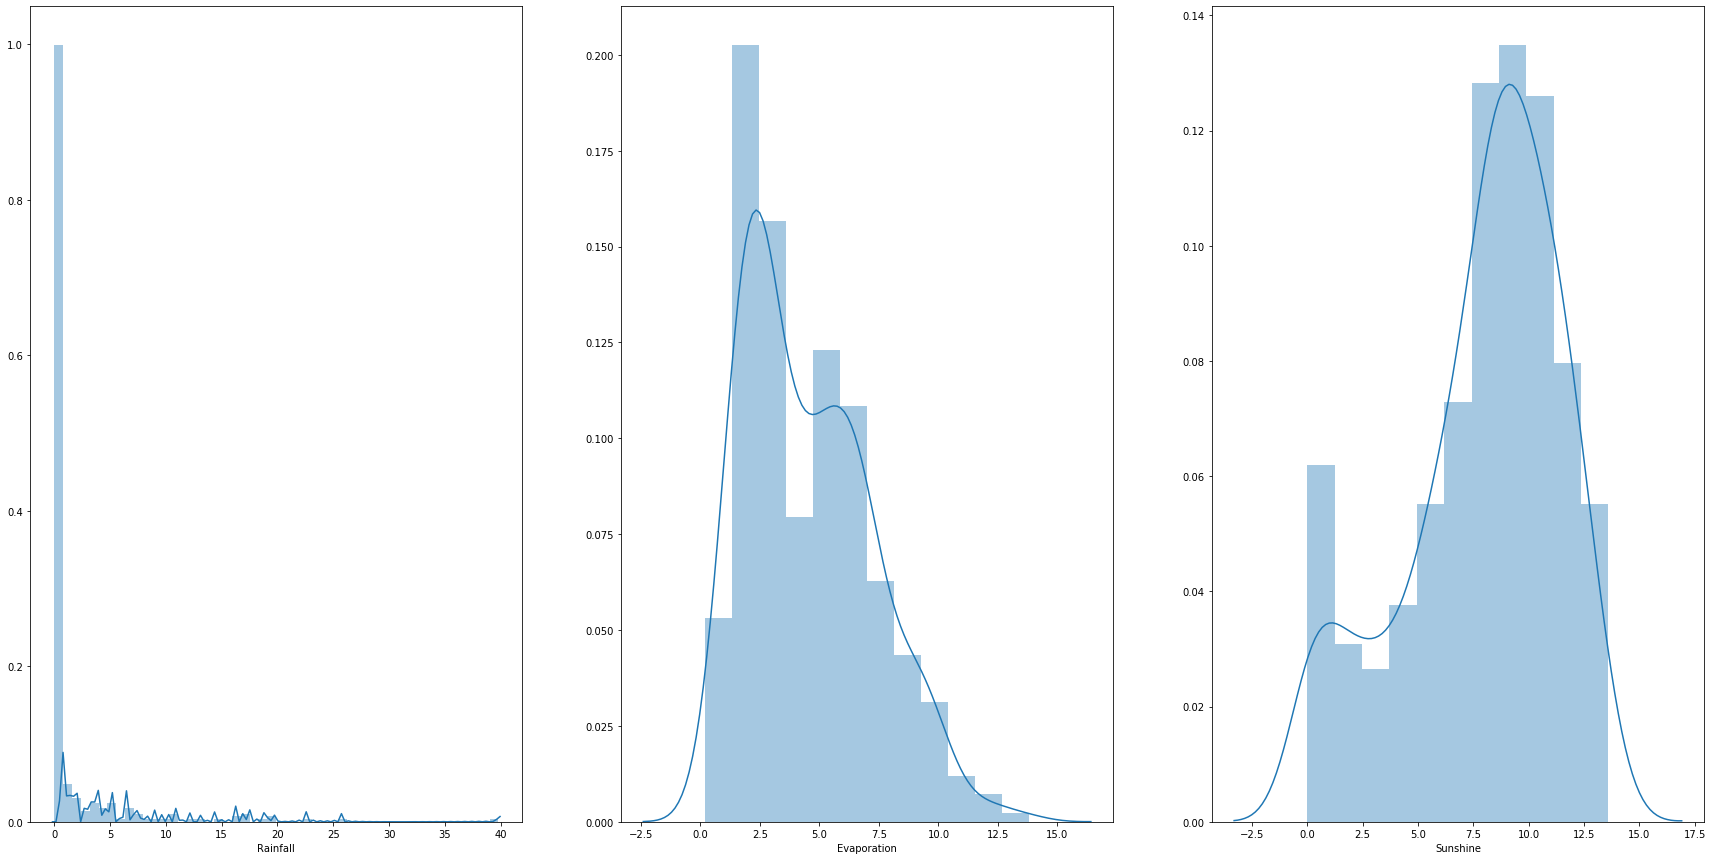

In [15]:
# visualization of the continuous data
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(30,15))
plt.suptitle('Continuous data')
sns.distplot(dataset['MaxTemp'], ax = ax1)
sns.distplot(dataset['MinTemp'], ax = ax2)
plt.show()

fig,(ax3, ax4, ax5) = plt.subplots(1,3,figsize=(30,15))
sns.distplot(dataset['Rainfall'], ax = ax3)
sns.distplot(dataset['Evaporation'], ax = ax4)
sns.distplot(dataset['Sunshine'], ax = ax5)
plt.show()

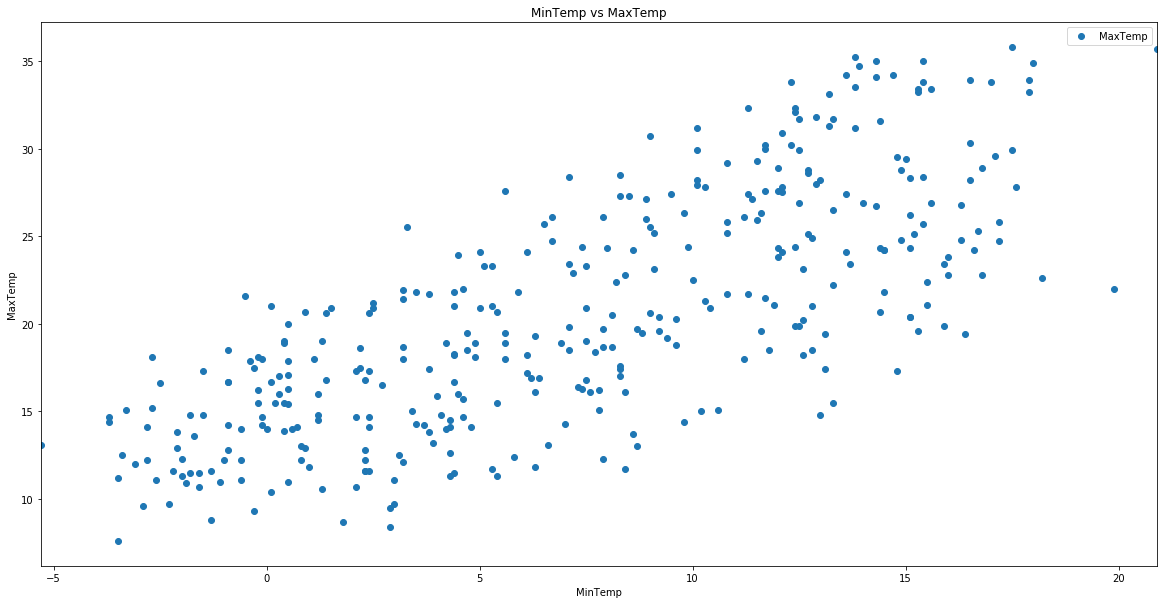

In [16]:
# checking to find any relationship between the data  
dataset.plot(x='MinTemp', y='MaxTemp', style='o', figsize=(20,10))  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [17]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [18]:
# split 80% of the data to the training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
#training the algorithm
lr.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# make predictions on the test data
y_pred = lr.predict(X_test)

In [21]:
#compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151


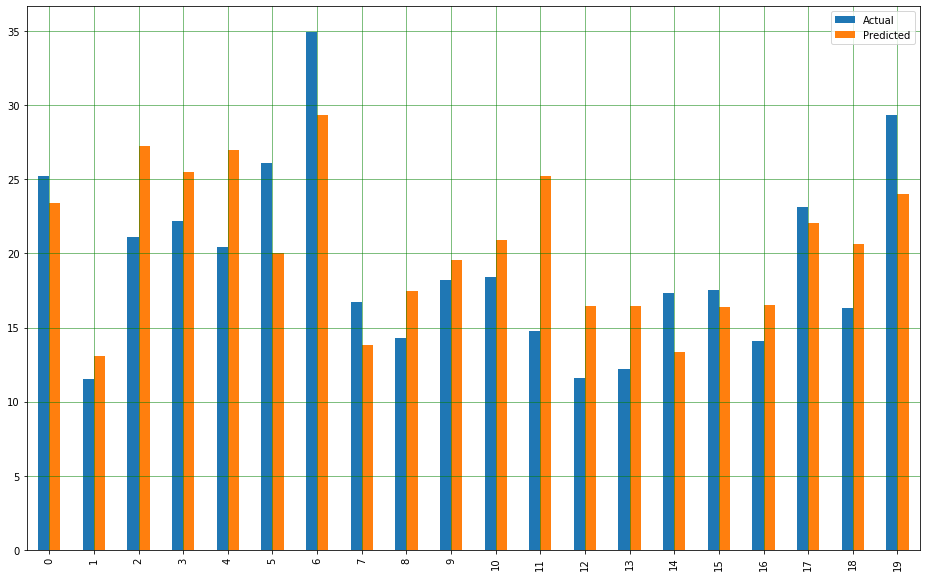

In [22]:
# the number of records is huge, for representation purpose I’m taking just 20 records
df1 = df.head(20)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

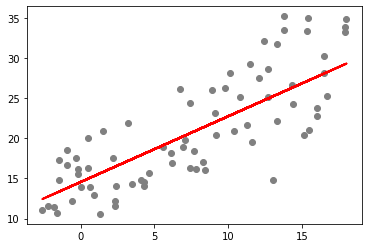

In [23]:
# regression line
plt.plot(kind='scatter', figsize=(20,10))
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.5094353112899594
Mean Squared Error: 17.011877668640622
Root Mean Squared Error: 4.124545753006096


In [25]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(lr.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(lr.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.55
Accuracy of Logistic regression classifier on test set: 0.64


In [26]:
dataset.RainToday.unique()

array(['No', 'Yes'], dtype=object)

In [27]:
# changing yes and no to 1 and 0
dataset.RainToday.replace({"Yes":1,"No":0}, inplace = True)

In [28]:
# i chose to classify the first five columns (binary classification)
train, test = train_test_split(dataset, test_size= 0.3)

In [29]:
train_features = train.iloc[:,:5]
train_class = train["RainToday"]
test_features = test.iloc[:,:5]
test_class = test["RainToday"]

In [30]:
# the type has to be pandas.core.series.Series
print(type(train_class))
print(type(test_class))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [31]:
print(train_features.shape)
print(test_features.shape)

(256, 5)
(110, 5)


In [32]:
#training the algorithm
rfc.fit(train_features, train_class)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
# make predictions on the test data
preds = rfc.predict(test_features)
print(metrics.classification_report(test_class, preds))
pd.crosstab(preds, test_class)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        20

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110



RainToday,0,1
row_0,,
0,90,0
1,0,20


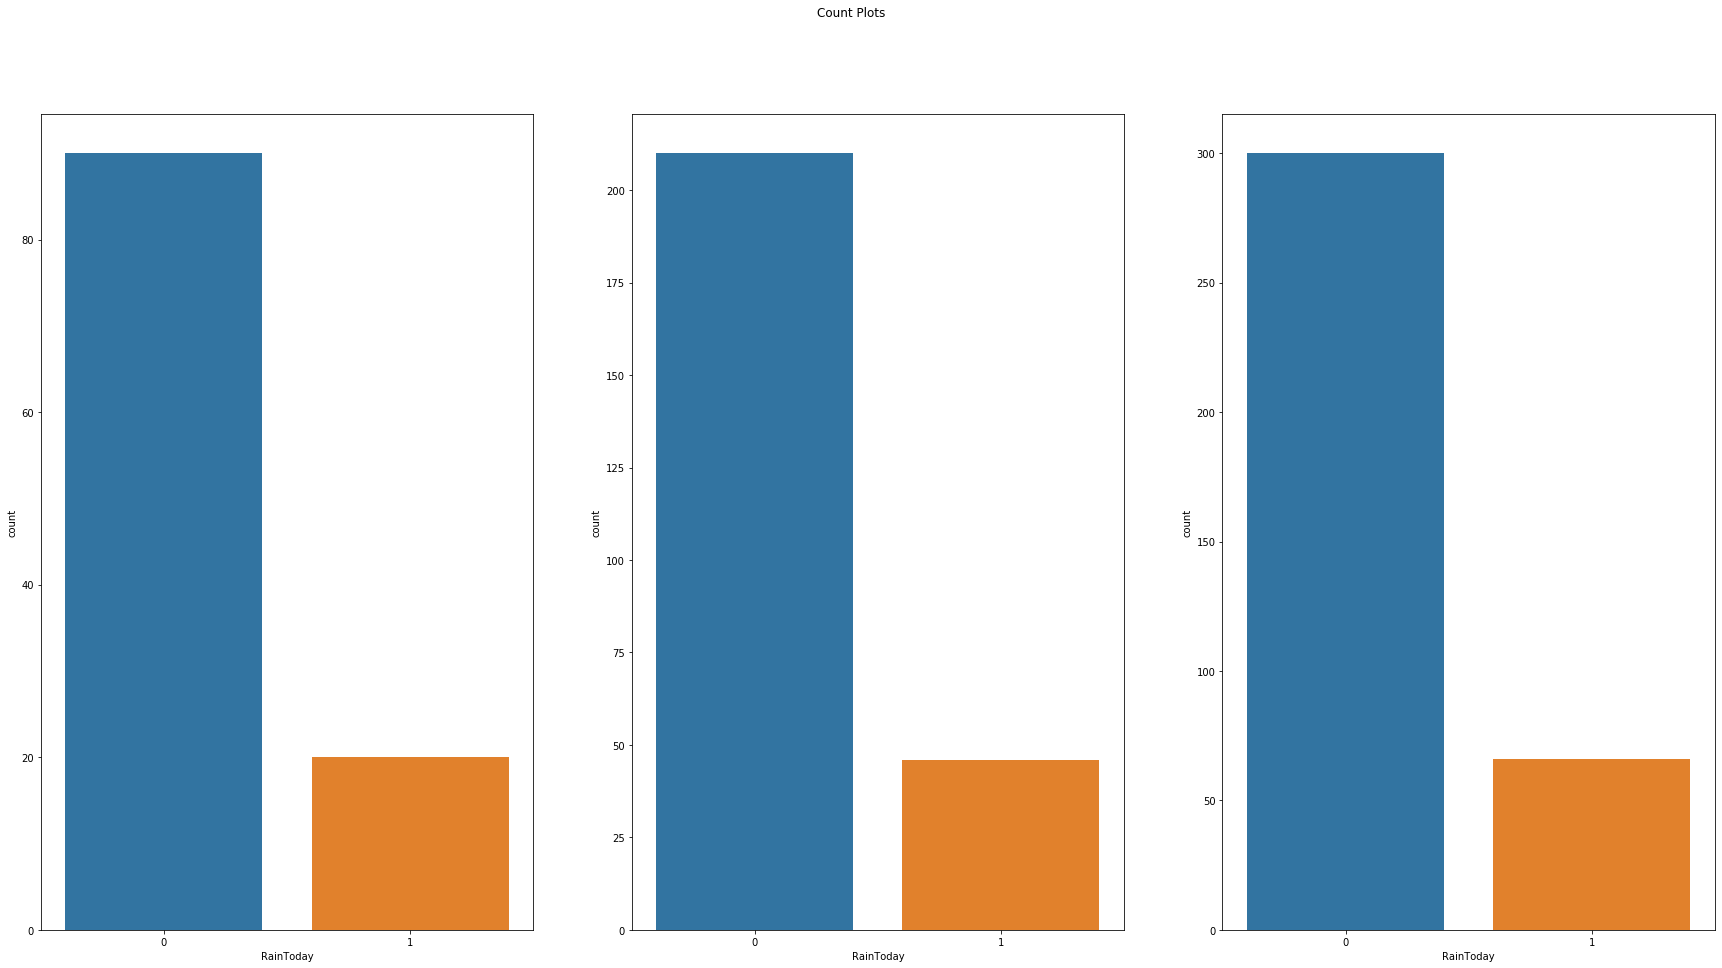

In [34]:
# visualization of test and train data
fig,(ax1, ax2, ax3) = plt.subplots(1,3,figsize=(30,15))
plt.suptitle('Count Plots')
sns.countplot('RainToday', data = test, ax = ax1) # The test data
sns.countplot('RainToday', data = train, ax = ax2) # The train data
sns.countplot('RainToday', data = dataset, ax = ax3) # The original data
plt.show()